In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/content/sample_data/ADA-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds         y
0    2020-07-13  0.124156
1    2020-07-14  0.131963
2    2020-07-15  0.130369
3    2020-07-16  0.125922
4    2020-07-17  0.122486
..          ...       ...
361  2021-07-09  1.349474
362  2021-07-10  1.336085
363  2021-07-11  1.348145
364  2021-07-12       NaN
365  2021-07-13  1.312721

[366 rows x 2 columns]


In [3]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-07-13
1   2020-07-14
2   2020-07-15
3   2020-07-16
4   2020-07-17
..         ...
726 2022-07-09
727 2022-07-10
728 2022-07-11
729 2022-07-12
730 2022-07-13

[731 rows x 1 columns]


In [5]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-12-26,1.524405,0.920682,2.149539
532,2021-12-27,1.518103,0.898131,2.121474
533,2021-12-28,1.521631,0.886445,2.163873
534,2021-12-29,1.522463,0.902962,2.128394
535,2021-12-30,1.526982,0.892726,2.168104
...,...,...,...,...
726,2022-07-09,1.545656,-0.393676,3.430624
727,2022-07-10,1.550752,-0.369312,3.449195
728,2022-07-11,1.544450,-0.398070,3.437413
729,2022-07-12,1.547978,-0.423217,3.422183


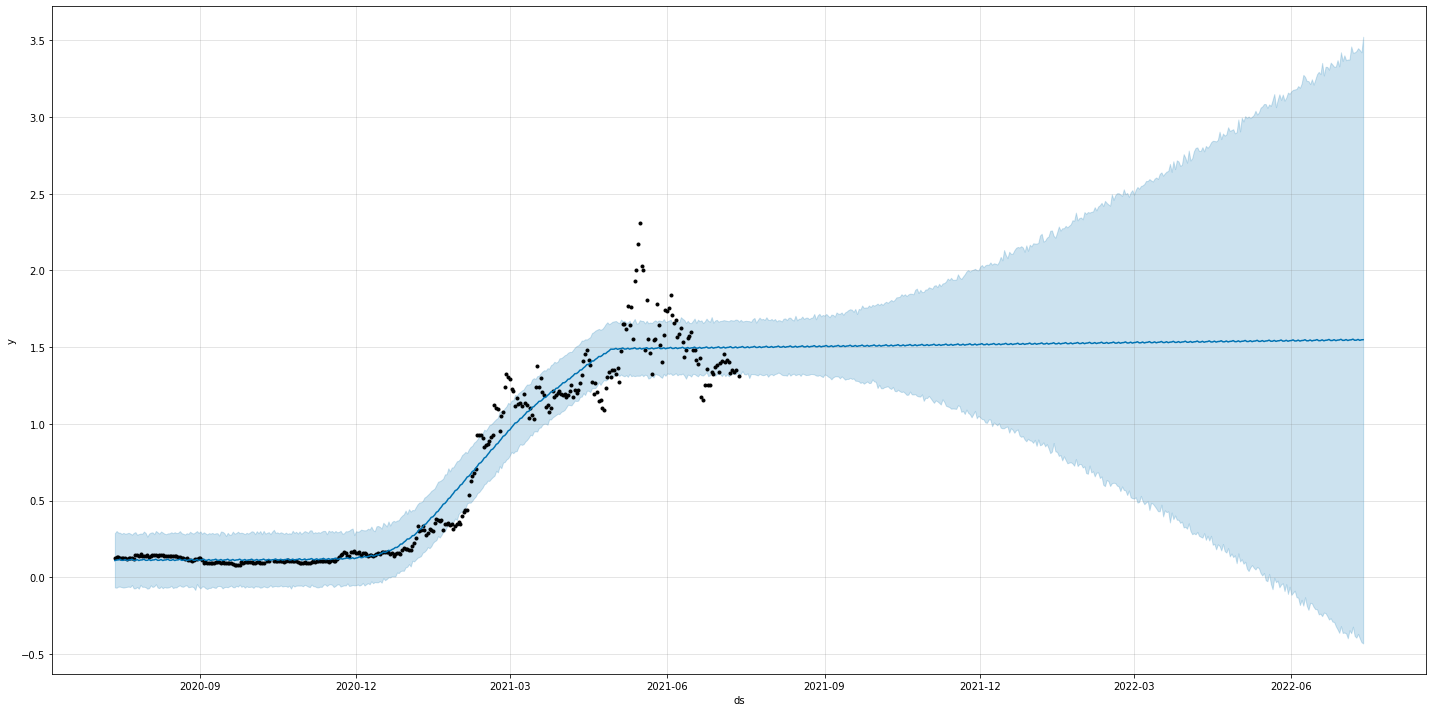

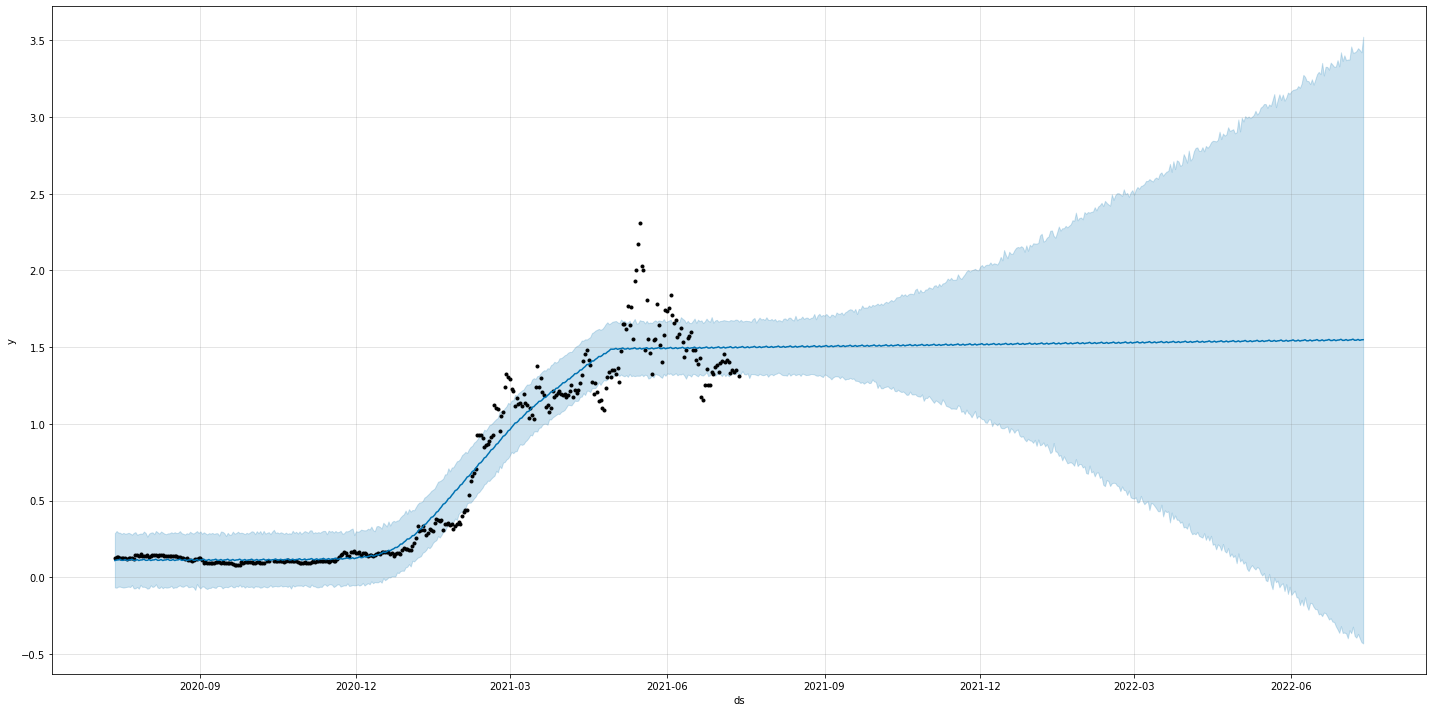

In [6]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))